## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [4]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [5]:
from pandas import (
    DataFrame, HDFStore
)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/Project-2-Computer-Vision-with-CNN/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels = pd.read_csv('./labels.csv')

In [12]:
labels.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


### Print the count of each category of Dogs given in the dataset



In [13]:
print(labels.breed.value_counts())

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64


### Get one-hot encodings of labels

In [0]:
labels_ec = tf.keras.utils.to_categorical(labels['breed'].factorize()[0])

In [15]:
labels_ec.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [16]:
from tqdm import tqdm
import cv2
img_rows = 128
img_cols = 128
x_train = []
y_train = []

for f,img in tqdm(labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows, img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:29<00:00, 343.77it/s]


In [17]:
print(y_train[110])
print(x_train[110].shape)

saluki
(128, 128, 3)


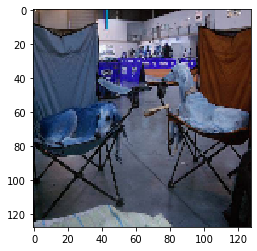

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[110])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [19]:
dum = pd.get_dummies(y_train)
encoded_labels = dum
y_train = dum

import numpy as np
y_train = np.array(y_train)

x_train = np.array(x_train)
x_train[0].shape

(128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [20]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))



8177
2045


In [21]:
x_train2[0].shape

(128, 128, 3)

In [0]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)

In [23]:
x_val = x_val.reshape(x_val.shape[0],128,128,3)
x_train2 = x_train2/255.

x_val = x_val/255.

print (x_train2.shape)
print (x_val.shape)


print(y_train2.shape)
print(y_val.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)
(8177, 120)
(2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [24]:
test_img = pd.read_csv('./sample_submission.csv')
test_img.sample(10)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
5498,8636f5669797f54ecdb973ed9e9f6f1d,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4954,78eca7a75e7f42a5699e5801eb56a46f,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3391,533f4094b80a234c74cbd2ea942060cf,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
7991,c556ea847716bc63672aceb1e42c96f4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008

Run the below code to load the test image files in x_test_feature

In [25]:
x_test_feature = []
img_rows = 128
img_cols = 128
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f[0]), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)


100%|██████████| 10357/10357 [00:29<00:00, 356.57it/s]


In [26]:
x_test_feature = np.array(x_test_feature)
x_test_feature[0].shape

(128, 128, 3)

Normalize the test data and convert it into 4 dimensions

In [27]:
x_test_feature = x_test_feature.reshape(x_test_feature.shape[0],128,128,3)
x_test_feature = x_val/255.
print (x_test_feature.shape)

(2045, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

In [29]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),input_shape=(128, 128, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(120, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#sgd = tf.keras.optimizers.SGD(lr=0.01, clipnorm=1, decay=1e-6, momentum = 0.9, nesterov=True)
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
flatten (Flatten)            (None, 476288)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               121929984 
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
Total params: 121,972,504
Trainable params: 121,972,504
Non-trainable params: 0
_________________________________________________________________


### Use batch_size = 128 and epochs = 10 and execute the model

In [31]:
print (x_train2.shape)
print (x_val.shape)
print(y_train2.shape)
print(y_val.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)
(8177, 120)
(2045, 120)


In [32]:
model.fit(x_train2,
          y_train2,          
          validation_data=(x_val,y_val),
          epochs=10,
          batch_size=128)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 14s 2ms/sample - loss: 6.2025 - acc: 0.0106 - val_loss: 4.7869 - val_acc: 0.0132
Epoch 2/10
8177/8177 [==============================] - 7s 852us/sample - loss: 4.7318 - acc: 0.0292 - val_loss: 4.7378 - val_acc: 0.0161
Epoch 3/10
8177/8177 [==============================] - 7s 846us/sample - loss: 3.7282 - acc: 0.2107 - val_loss: 4.9773 - val_acc: 0.0264
Epoch 4/10
8177/8177 [==============================] - 7s 848us/sample - loss: 1.2837 - acc: 0.7201 - val_loss: 7.0865 - val_acc: 0.0269
Epoch 5/10
8177/8177 [==============================] - 7s 847us/sample - loss: 0.1846 - acc: 0.9697 - val_loss: 9.7038 - val_acc: 0.0200
Epoch 6/10
8177/8177 [==============================] - 7s 844us/sample - loss: 0.0586 - acc: 0.9949 - val_loss: 9.7758 - val_acc: 0.0210
Epoch 7/10
8177/8177 [==============================] - 7s 849us/sample - loss: 0.0380 - acc: 0.9971 - val_loss: 9.6085 - val

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator
datagen.fit(x_train2)

In [36]:
model.fit(x_train2,
          y_train2,          
          validation_data=(x_val,y_val),
          epochs=10,
          batch_size=128)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 8s 925us/sample - loss: 0.0048 - acc: 0.9989 - val_loss: 10.1849 - val_acc: 0.0230
Epoch 2/10
8177/8177 [==============================] - 8s 924us/sample - loss: 0.0042 - acc: 0.9990 - val_loss: 9.9537 - val_acc: 0.0220
Epoch 3/10
8177/8177 [==============================] - 7s 916us/sample - loss: 0.0027 - acc: 0.9994 - val_loss: 10.4509 - val_acc: 0.0205
Epoch 4/10
8177/8177 [==============================] - 7s 917us/sample - loss: 0.0040 - acc: 0.9989 - val_loss: 10.4820 - val_acc: 0.0235
Epoch 5/10
8177/8177 [==============================] - 8s 918us/sample - loss: 0.0025 - acc: 0.9994 - val_loss: 10.5520 - val_acc: 0.0240
Epoch 6/10
8177/8177 [==============================] - 7s 915us/sample - loss: 0.0026 - acc: 0.9993 - val_loss: 10.4242 - val_acc: 0.0230
Epoch 7/10
8177/8177 [==============================] - 7s 916us/sample - loss: 0.0021 - acc: 0.9994 - val_loss: 10.538

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = datagen.flow(x_train2,y_train2,batch_size=32)
val_generator = datagen.flow(x_val,y_val,batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [41]:
model.fit_generator(train_generator,steps_per_epoch=x_train2.shape[0],
                    epochs=10,
                    validation_data=val_generator)

Epoch 1/10
8177/8177 [==============================] - 960s 117ms/step - loss: 4.5498 - acc: 0.0316 - val_loss: 4.4471 - val_acc: 0.0465
Epoch 2/10
8177/8177 [==============================] - 959s 117ms/step - loss: 4.1990 - acc: 0.0667 - val_loss: 4.3843 - val_acc: 0.0572
Epoch 3/10
8177/8177 [==============================] - 962s 118ms/step - loss: 4.0130 - acc: 0.0895 - val_loss: 4.3703 - val_acc: 0.0577
Epoch 4/10
8177/8177 [==============================] - 949s 116ms/step - loss: 3.8794 - acc: 0.1070 - val_loss: 4.3354 - val_acc: 0.0743
Epoch 5/10
8177/8177 [==============================] - 957s 117ms/step - loss: 3.7633 - acc: 0.1244 - val_loss: 4.4731 - val_acc: 0.0738
Epoch 6/10
8177/8177 [==============================] - 949s 116ms/step - loss: 3.6750 - acc: 0.1392 - val_loss: 4.4636 - val_acc: 0.0880
Epoch 7/10
8177/8177 [==============================] - 948s 116ms/step - loss: 3.6004 - acc: 0.1489 - val_loss: 4.4783 - val_acc: 0.0822
Epoch 8/10
8177/8177 [============

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras import applications
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Input
# Instantiate the model with the pre-trained weights (no top)
#base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),include_top=False, pooling='avg')

base_model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))

Print the summary of the base_model

In [73]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras.layers import Flatten, Dense
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(120, activation="softmax")(x)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
# Freeze the layers which you don't want to train.
for layer in base_model.layers[:]:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [76]:
from keras import applications
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

# creating the final model 
model_final = Model(input = base_model.input, output = predictions)

# compile the model 
sgd = optimizers.SGD(lr=0.000001, decay=1e-6, momentum=0.9, nesterov=True)
model_final.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics=["accuracy"])


# Save the model 
checkpoint = ModelCheckpoint("vgg16_best.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')

epochs=10
# Train the model 
model_final.fit(x_train, y_train, batch_size = 128, epochs = epochs, validation_data=(x_val, y_val), callbacks = [checkpoint, early])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


Train on 10222 samples, validate on 2045 samples
Epoch 1/10
10222/10222 [==============================] - 11s 1ms/step - loss: 15.6252 - acc: 0.0097 - val_loss: 4.9213 - val_acc: 0.0117

Epoch 00001: val_acc improved from -inf to 0.01174, saving model to vgg16_best.h5
Epoch 2/10
10222/10222 [==============================] - 10s 1ms/step - loss: 15.5910 - acc: 0.0110 - val_loss: 4.9204 - val_acc: 0.0117

Epoch 00002: val_acc did not improve from 0.01174
Epoch 3/10
10222/10222 [==============================] - 10s 1ms/step - loss: 15.5589 - acc: 0.0120 - val_loss: 4.9196 - val_acc: 0.0127

Epoch 00003: val_acc improved from 0.01174 to 0.01271, saving model to vgg16_best.h5
Epoch 4/10
10222/10222 [==============================] - 10s 1ms/step - loss: 15.5282 - acc: 0.0130 - val_loss: 4.9188 - val_acc: 0.0127

Epoch 00004: val_acc did not improve from 0.01271
Epoch 5/10
10222/10222 [==============================] - 10s 1ms/step - loss: 15.4988 - acc: 0.0140 - val_loss: 4.9181 - val_ac